In [1]:
from macrosim.SimEngine import SimEngine
from macrosim.EqSearch import EqSearch
from macrosim.GrowthDetector import GrowthDetector
from macrosim.SeriesAccessor import SeriesAccessor
from macrosim.BaseVarSelector import BaseVarSelector

import datetime as dt
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)

start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-01-01')

df = fred.get_series(
    series_ids = ['NETEXP', 'CIVPART', 'CORESTICKM159SFRBATL', 'LES1252881600Q', 'SPPOPGROWUSA', 'A264RX1A020NBEA', 'GDPC1'],
    series_alias=[None, None, 'CPI', 'RWAGE', 'POPGROWTH', 'I_C', 'RGDP'],
    reindex_freq='QS',
    date_range=(start, end),
    
)
df = fred.fill(
    data=df,
    methods=[None, None, None, None, 'ffill', 'divide', None]
)
df

,NETEXP,CIVPART,CPI,RWAGE,POPGROWTH,I_C,RGDP
2002-01-01,-386.884,66.5,3.557463,341.0,0.927797,80.2338,14372.785
2002-04-01,-428.259,66.7,3.465822,339.0,0.927797,80.2338,14460.848
2002-07-01,-447.548,66.5,3.263706,337.0,0.927797,80.2338,14519.633
2002-10-01,-496.289,66.6,2.937194,336.0,0.927797,80.2338,14537.580
2003-01-01,-525.262,66.4,2.778159,335.0,0.859482,82.2952,14614.141
...,...,...,...,...,...,...,...
2023-01-01,-813.648,62.4,6.488339,364.0,0.491925,126.6340,22403.435
2023-04-01,-803.479,62.6,6.267738,365.0,0.491925,126.6340,22539.418
2023-07-01,-781.091,62.6,5.402919,366.0,0.491925,126.6340,22780.933
2023-10-01,-791.152,62.7,4.882717,370.0,0.491925,126.6340,22960.600


In [3]:
gd = GrowthDetector()
opt = gd.find_opt_growth(df)
opt

{'NETEXP': (Logarithmic(x, 682.72, 0.0, 1.0, 71.03), MSE = 20057.27),
 'CIVPART': (Linear(x, -0.06), MSE = 0.38),
 'CPI': (Logarithmic(x, 1.85, 1.13, 1.0, 0.03), MSE = 1.22),
 'RWAGE': (Exponential(x, 1.0, 0.0), MSE = 119.37),
 'POPGROWTH': (Exponential(x, 1.02, -0.02), MSE = 0.02),
 'I_C': (Exponential(x, 1.02, -1.46), MSE = 409.61),
 'RGDP': (Exponential(x, 1.01, 0.0), MSE = 179883.40)}

In [6]:
eqsr = EqSearch(
    X= df.drop('RGDP', axis=1),
    y= df['RGDP']
)
eqsr.distil_split()
eqsr.search(
    cv=True,
    maxsize=22,
    niterations=50
)

eq = eqsr.eq

RandomForest Score at Distillation: 0.988


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 2.500e+05
Progress: 1172 / 1550 total iterations (75.613%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.555e+06  1.594e+01  y = 18331
3           3.831e+05  1.337e+00  y = I_C * 175.85
5           2.993e+05  1.234e-01  y = (I_C + CPI) * 171.51
7           2.492e+05  9.159e-02  y = ((CPI + I_C) * 165.69) - NETEXP
9           2.379e+05  2.324e-02  y = (NETEXP * -1.7522) + ((I_C + CPI) * 161.31)
11          2.378e+05  2.929e-04  y = ((CPI + I_C) * 160.52) - ((NETEXP * 1.7373) - 94.886)
12          2.280e+05  4.209e-02  y = (log(CPI) + ((I_C + CPI) - (0.0097857 * NETEXP))) * 16...
                                      1.01
13          2.015e+05  1.236e-01  y = (I_C * ((-12.266 / CPI) - -167.17)) + (457.93 - (1.643...
                             

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 2.680e+05
Progress: 1312 / 1550 total iterations (84.645%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.511e+06  1.594e+01  y = 18084
3           2.461e+06  4.030e-01  y = RWAGE ^ 1.6782
5           1.280e+06  3.268e-01  y = (CIVPART * -1303.1) - -1.0177e+05
7           7.881e+05  2.427e-01  y = ((RWAGE + -1303.6) * CIVPART) - -79684
9           6.492e+05  9.690e-02  y = (((RWAGE + -1295.2) * CIVPART) - -78526) - NETEXP
11          4.720e+05  1.593e-01  y = ((RWAGE + -1235.9) * CIVPART) + ((CPI * 495.22) - -740...
                                      56)
13          4.048e+05  7.682e-02  y = (CIVPART * (RWAGE + -1235.5)) + (((CPI * 435.51) - -73...
                                      574) - NETEXP)
15          3.476e+05  7.615e-02  y = (CI

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 2.720e+05
Progress: 1314 / 1550 total iterations (84.774%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.574e+06  1.594e+01  y = 18416
3           2.474e+06  4.062e-01  y = RWAGE ^ 1.6798
5           1.111e+06  4.001e-01  y = (-1.4311e+06 / I_C) + 32223
7           7.867e+05  1.727e-01  y = ((-11596 / I_C) + RWAGE) * 78.514
9           6.478e+05  9.713e-02  y = (CPI + ((-2807.4 / I_C) + 77.48)) * RWAGE
11          6.007e+05  3.773e-02  y = (CPI + ((-5504.2 / (I_C + -39.752)) + RWAGE)) * 70.45
13          5.505e+05  4.367e-02  y = ((CPI + (793.34 - (RWAGE + CIVPART))) * (RWAGE + RWAGE...
                                      )) - 2.484e+05
14          5.372e+05  2.448e-02  y = (-2.516e+05 / (I_C + -47.336)) + ((RWAGE - exp(POPGROW...
          

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 2.610e+05
Progress: 1194 / 1550 total iterations (77.032%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.875e+06  1.594e+01  y = 18062
3           3.034e+06  2.372e-01  y = RWAGE * 52.505
4           2.411e+06  2.297e-01  y = sqrt(I_C * 3.1117e+06)
5           1.208e+06  6.909e-01  y = 91786 - (CIVPART * 1150.9)
7           6.256e+05  3.291e-01  y = I_C * ((I_C * -0.46643) - -224.28)
9           4.364e+05  1.801e-01  y = ((I_C * -0.63308) - -281.19) * (I_C - 18.896)
11          3.482e+05  1.129e-01  y = (CPI + (I_C - 21.002)) * ((I_C * -0.63665) - -282.12)
13          3.084e+05  6.067e-02  y = (((NETEXP * -0.027685) + (I_C * -0.63489)) - -257.71) ...
                                      * (I_C - 16.338)
15          2.663e+05  7.334e-02  y = (

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 2.420e+05
Progress: 1224 / 1550 total iterations (78.968%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.872e+06  1.594e+01  y = 18157
3           3.645e+06  2.384e-01  y = RWAGE * 52.602
4           2.718e+06  2.934e-01  y = sqrt(I_C) * 1773.2
5           1.410e+06  6.567e-01  y = (CIVPART * -1196) + 94819
7           8.196e+05  2.711e-01  y = ((-3087.6 / I_C) + 82.617) * RWAGE
9           7.076e+05  7.348e-02  y = RWAGE * ((-1622.2 / (I_C - 29.503)) + 74.946)
10          6.087e+05  1.506e-01  y = ((1834.7 - I_C) * sqrt(RWAGE)) + (-1.4284e+06 / I_C)
12          5.693e+05  3.344e-02  y = (((-94391 / I_C) + 2095.1) * sqrt(RWAGE)) - (I_C * 34....
                                      188)
13          4.261e+05  2.898e-01  y = sqrt(RWAGE) * ((-76

In [7]:
eq

sqrt(RWAGE)*(17.5584023188328*CPI - I_C + POPGROWTH*(CPI - 127.58689) + 1787.64354291535 - 67417.79/I_C)

In [18]:
initial_params = {
    col: (df[col].iloc[0], opt[col][0]) for col in df.columns[:-1]
}

engine = SimEngine(
    eq=eq,
    init_params=initial_params,
    deterministic=True,
    entropy_coef=0.01
)

Error in callback _flush_stdio (for post_execute):


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [19]:
for _ in range(50):
    next(engine._simulate())

engine.get_history()

,NETEXP,CIVPART,CPI,RWAGE,POPGROWTH,I_C,output
step,,,,,,,
0,-436.481044,66.350267,3.045262,346.385165,0.923238,80.317881,14738.426271
1,-488.138739,66.801150,2.785614,348.457292,0.916485,80.216929,14856.419197
2,-526.342522,65.466297,2.626052,346.689762,0.904604,80.742076,14823.854942
3,-550.881718,64.484664,2.627768,346.098493,0.902344,79.871208,15195.949398
4,-571.787728,64.498260,2.560897,347.591079,0.894026,79.902209,15337.805186
5,-587.063553,65.634008,2.554764,344.104941,0.898268,79.188909,15433.970364
6,-603.083016,64.291064,2.517915,344.973203,0.901880,79.575072,14945.333998
7,-612.642726,64.039788,2.494421,342.679516,0.894814,80.677372,15360.060190
8,-622.253505,62.853894,2.527183,341.548876,0.885707,81.454729,15525.818874


Error in callback _flush_stdio (for post_execute):


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

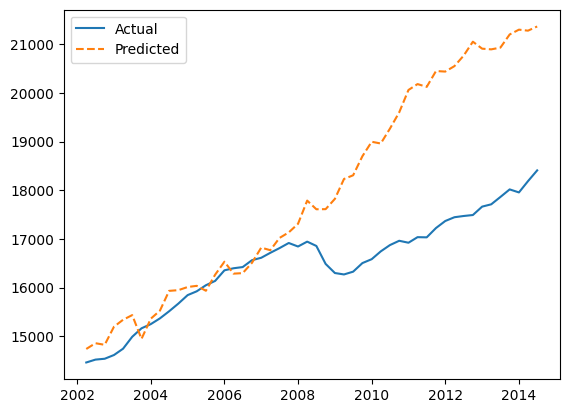

Error in callback _flush_stdio (for post_execute):


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [20]:
act = df['RGDP'].iloc[1:51]
pred = engine.get_history()['output']
pred.index = act.index

plt.plot(act, label='Actual')
plt.plot(pred, label='Predicted', linestyle='--')

plt.legend()
plt.show()

In [17]:
eqsr.eq

CIVPART*(-20.026264 - 17185.592/I_C) + I_C*(-25.116253) - (-39.411087*RWAGE - 19710.518) + (CPI*202.80757 + POPGROWTH*(-(NETEXP + RWAGE) - 1173.187))*exp(POPGROWTH)

Error in callback _flush_stdio (for post_execute):


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [8]:
bvd = BaseVarSelector(df=df)
G = bvd.granger_matrix()
bvd.granger_score(G)

C:\Users\Gong Jr\.conda\envs\MacroSim\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Gong Jr\.conda\envs\MacroSim\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Gong Jr\.conda\envs\MacroSim\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Gong Jr\.conda\envs\MacroSim\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Gong Jr\.conda\envs\MacroSim\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Gong Jr\.conda\envs\MacroSim\Lib\site-packages\statsmodels\ts

CPI          3.0
RWAGE        1.0
NETEXP       0.0
POPGROWTH    0.0
I_C         -1.0
RGDP        -1.0
CIVPART     -2.0
dtype: float64